# 2020 plots for Rosie Point Loma paper

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 
# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42; matplotlib.rcParams['ps.fonttype'] = 42

## Import data into Pandas

In [2]:
datapath="/Users/zanejobe/Dropbox/1 PointLomaRosieCABR/Compilation_Database/Digitize/PLdata/PointLomaShp_2019/"
filename="aaPLData_Thickness_ThinningRate_Distance_Lithology_Element.txt"
df = pd.read_csv(datapath + filename, header=1, names=['th', 'tr', 'dist', 'lith', 'el']) 

# drop rows with NaNs for thickness and zero values
df = df[np.isfinite(df['th']) & df.th>0]
# and now the same for thinning rate
df = df[np.isfinite(df['tr']) & df.tr>0]
# and get rid of the datum "garbage bed" that has an element number=10
df=df[df.el != 10] # the != means "not equal to"
# make some log10 columns to make plotting easier
df['logth']=np.log10(df.th)
df['logtr']=np.log10(df.tr)
df['logdist']=np.log10(df.dist)

df.describe()

,th,tr,dist,lith,el,logth,logtr,logdist
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,0.098929,0.001415,50.768179,0.483404,2.194043,-1.152765,-3.155996,1.606794
std,0.085839,0.001823,34.336075,0.499937,0.780817,0.365147,0.558348,0.301332
min,0.003000,0.000014,11.707022,0.000000,1.000000,-2.522879,-4.852606,1.068446
25%,0.038000,0.000310,27.264617,0.000000,2.000000,-1.420216,-3.508370,1.435599
50%,0.064000,0.000718,43.795179,0.000000,2.000000,-1.193820,-3.143912,1.641426
75%,0.136500,0.001758,66.081153,1.000000,3.000000,-0.864870,-2.755002,1.820078
max,0.459000,0.014180,196.236761,1.000000,4.000000,-0.338187,-1.848338,2.292780


# Thickness vs Thinning Rate
## Thickness vs thinning rate for Elements 1-4

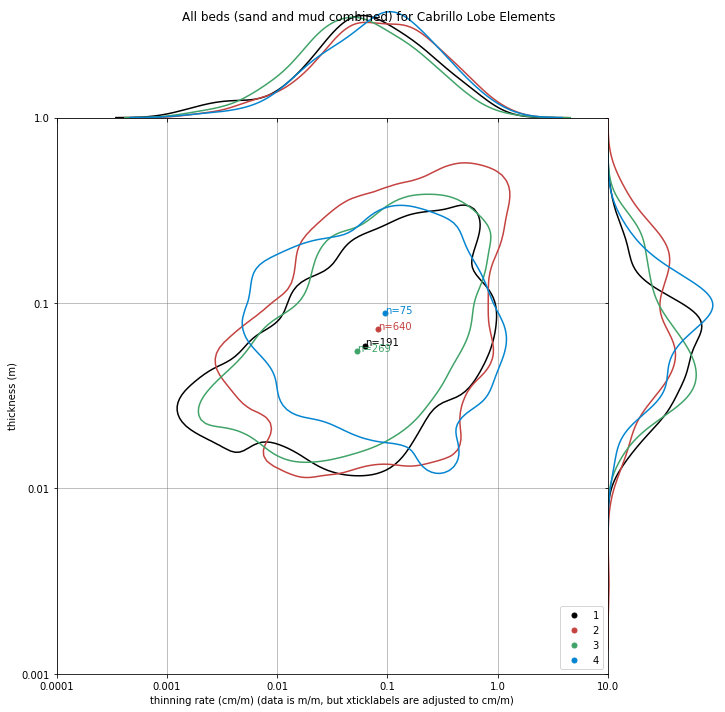

In [3]:
xlab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"
ylab="thickness (m)"
colors = ["black", "xkcd:reddish" , "xkcd:greenish", "xkcd:cerulean"]
ncolor = 0

g = sns.JointGrid("logtr", "logth", df, height=10, space=0)

for el, values in df.groupby("el"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colors[ncolor], s=25)
    g.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colors[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g.ax_joint, color=colors[ncolor])
    ncolor+=1

xlim=[-6,-1]
ylim=[-3,0]

g.fig.suptitle('All beds (sand and mud combined) for Cabrillo Lobe Elements')
g.ax_joint.legend('1234',loc='lower right') #not the best way, but it works
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 
xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 
ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel));

#plt.savefig("Elements_1-4_th_tr" + ".pdf", transparent=True)

## Comparing Sand and Mud thicknesses > 10 cm and < 10 cm

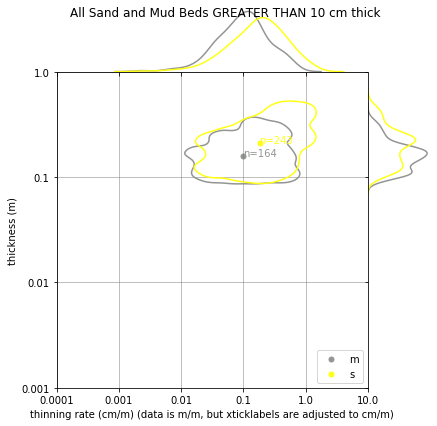

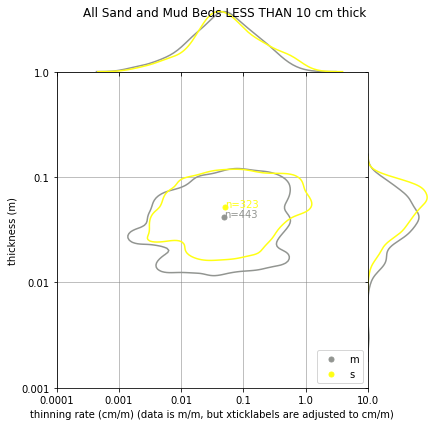

In [4]:
xlab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"
ylab="thickness (m)"
colorslith = ["xkcd:grey","xkcd:yellow"]
ncolor=0

g = sns.JointGrid("logtr", "logth", df, height=6, space=0)

for lith,values in df.groupby('lith'):
    values=values[values['th']>0.1]
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
    g.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colorslith[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g.ax_joint, color=colorslith[ncolor])
    ncolor+=1

xlim=[-6,-1]
ylim=[-3,0]
g.fig.suptitle('All Sand and Mud Beds GREATER THAN 10 cm thick')
g.ax_joint.legend('ms',loc='lower right') #not the best way, but it works
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 
xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 
ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel));
    
g = sns.JointGrid("logtr", "logth", df, height=6, space=0)
ncolor=0
for lith,values in df.groupby('lith'):
    values=values[values['th']<0.1]
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
    g.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colorslith[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g.ax_joint, color=colorslith[ncolor])
    ncolor+=1

xlim=[-6,-1]
ylim=[-3,0]
g.fig.suptitle('All Sand and Mud Beds LESS THAN 10 cm thick')
g.ax_joint.legend('ms',loc='lower right') #not the best way, but it works
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 
xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 
ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel));


## Sand vs mud for elements 1-4

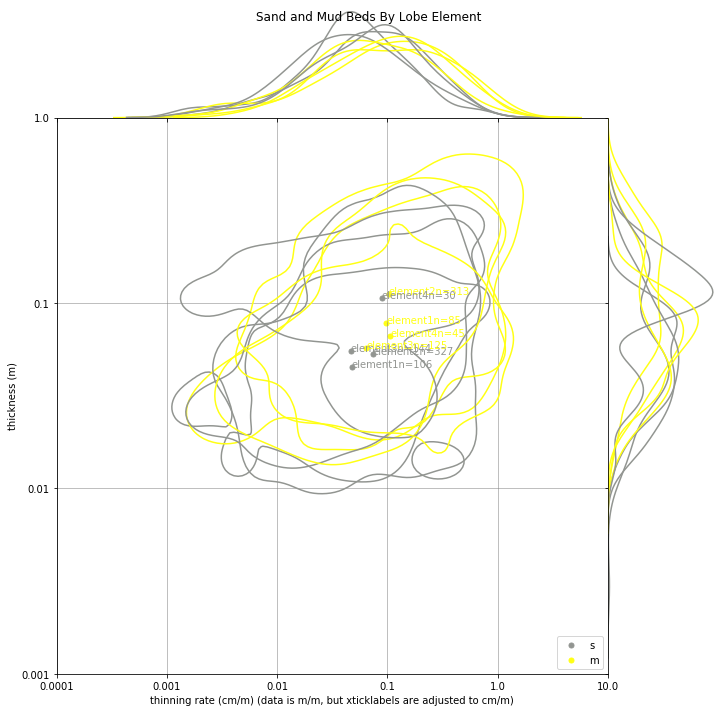

In [5]:
xlab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"
ylab="thickness (m)"
colorslith = ["xkcd:grey","xkcd:yellow"]

g = sns.JointGrid("logtr", "logth", df, height=10, space=0)
eln=1
for el, values0 in df.groupby("el"):
    ncolor=0
    for group, values in values0.groupby("lith"): 
        # plot the marginal KDEs for x and y
        sns.kdeplot(values["logtr"], ax=g.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
        sns.kdeplot(values["logth"], ax=g.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
        # plot the median values
        g.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
        g.ax_joint.text(values["logtr"].median(),values["logth"].median(), 'element' + str(eln) + 'n=' + str(len(values["logth"])),color=colorslith[ncolor])
        # now plot the 2D contour map of 90% contour
        density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g.ax_joint, color=colorslith[ncolor])
        ncolor+=1
    eln+=1

xlim=[-6,-1]
ylim=[-3,0]
g.fig.suptitle('Sand and Mud Beds By Lobe Element')
g.ax_joint.legend('sm',loc='lower right') #not the best way, but it works
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 
xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 
ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel));


## Sand beds > 10 cm thick for elements 1-4

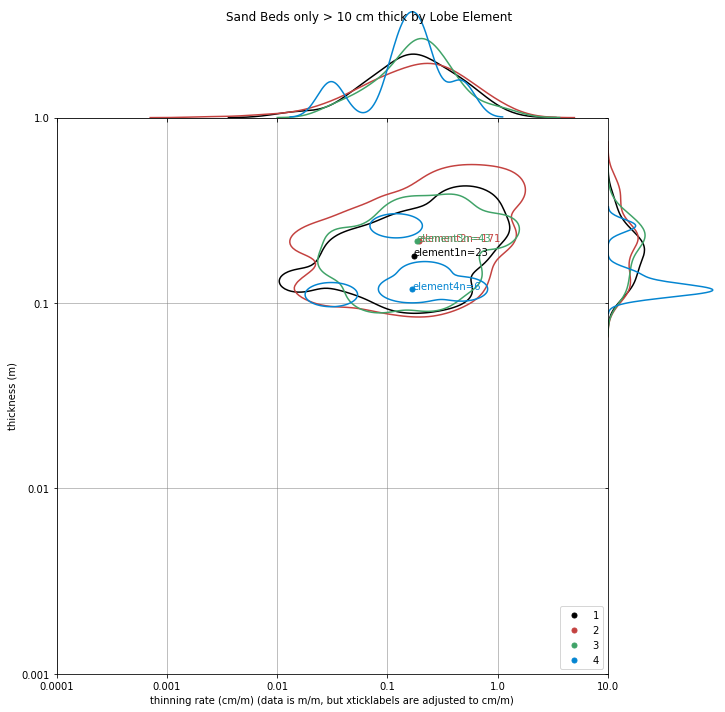

In [6]:
xlab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"
ylab="thickness (m)"
colors = ["black", "xkcd:reddish" , "xkcd:greenish", "xkcd:cerulean"]
ncolor = 0

g = sns.JointGrid("logtr", "logth", df, height=10, space=0)
for el, values in df.groupby("el"):
    values=values[values['lith']==1]
    values=values[values['th']>0.1]
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colors[ncolor], s=25)
    g.ax_joint.text(values["logtr"].median(),values["logth"].median(), 'element' + str(ncolor+1) + 'n=' + str(len(values["logth"])),color=colors[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g.ax_joint, color=colors[ncolor])
    ncolor+=1

xlim=[-6,-1]
ylim=[-3,0]
g.fig.suptitle('Sand Beds only > 10 cm thick by Lobe Element')
g.ax_joint.legend('1234',loc='lower right') #not the best way, but it works
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 
xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 
ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel));

## Sand vs mud for each element 1-4

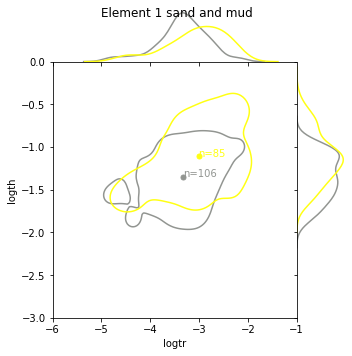

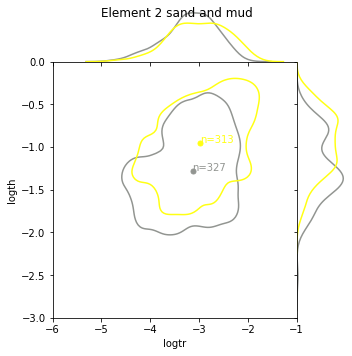

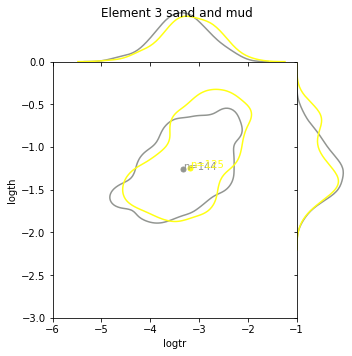

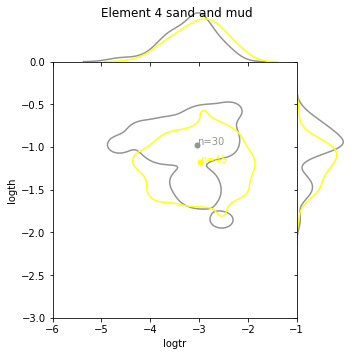

In [7]:
xlab="thinning rate m/m"
ylab="thickness (m)"
colorslith = ["xkcd:grey","xkcd:yellow"]
ncolor=0

xlim=[-6,-1]
ylim=[-3,0]

el1=df[df['el']==1] # element 1
el2=df[df['el']==2] # element 2
el3=df[df['el']==3] # element 3
el4=df[df['el']==4] # element 4

g1 = sns.JointGrid("logtr", "logth", el1, height=5, space=0, xlim=xlim, ylim=ylim)
g2 = sns.JointGrid("logtr", "logth", el2, height=5, space=0, xlim=xlim, ylim=ylim)
g3 = sns.JointGrid("logtr", "logth", el3, height=5, space=0, xlim=xlim, ylim=ylim)
g4 = sns.JointGrid("logtr", "logth", el4, height=5, space=0, xlim=xlim, ylim=ylim)

for lith,values in el1.groupby('lith'):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g1.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g1.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g1.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
    g1.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colorslith[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g1.ax_joint, color=colorslith[ncolor])
    ncolor+=1;
g1.fig.suptitle('Element 1 sand and mud')

ncolor=0
for lith,values in el2.groupby('lith'):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g2.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g2.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g2.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
    g2.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colorslith[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g2.ax_joint, color=colorslith[ncolor])
    ncolor+=1;
g2.fig.suptitle('Element 2 sand and mud')

ncolor=0
for lith,values in el3.groupby('lith'):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g3.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g3.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g3.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
    g3.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colorslith[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g3.ax_joint, color=colorslith[ncolor])
    ncolor+=1;
g3.fig.suptitle('Element 3 sand and mud')

ncolor=0
for lith,values in el4.groupby('lith'):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logtr"], ax=g4.ax_marg_x, color=colorslith[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logth"], ax=g4.ax_marg_y, color=colorslith[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g4.ax_joint.scatter(values["logtr"].median(),values["logth"].median(), color=colorslith[ncolor], s=25)
    g4.ax_joint.text(values["logtr"].median(),values["logth"].median(),'n='+ str(len(values["logth"])),color=colorslith[ncolor])
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logtr"], values["logth"], frac=0.9, ax=g4.ax_joint, color=colorslith[ncolor])
    ncolor+=1;
g4.fig.suptitle('Element 4 sand and mud');

## Now just KDE plots for Sand vs mud for each element 1-4

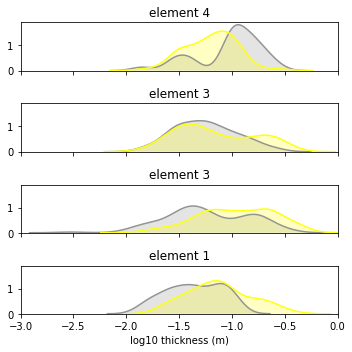

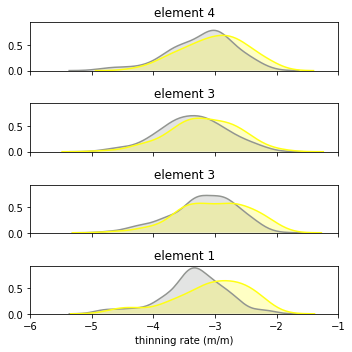

In [20]:
el1=df[df['el']==1] # element 1
el2=df[df['el']==2] # element 2
el3=df[df['el']==3] # element 3
el4=df[df['el']==4] # element 4

fig, axs = plt.subplots(4,figsize=(5, 5),sharex=True,sharey=True)
plt.setp(axs, xlim=[-3,0]) # set up x axis
xlab="log10 thickness (m)"

elnum=el4
sns.distplot(elnum[elnum.lith==0].logth, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[0])
sns.distplot(elnum[elnum.lith==1].logth, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[0])
axs[0].set_title('element 4')
axs[0].set_xlabel('')

elnum=el3
sns.distplot(elnum[elnum.lith==0].logth, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[1])
sns.distplot(elnum[elnum.lith==1].logth, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[1])
axs[1].set_title('element 3')
axs[1].set_xlabel('')

elnum=el2
sns.distplot(elnum[elnum.lith==0].logth, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[2])
sns.distplot(elnum[elnum.lith==1].logth, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[2])
axs[2].set_title('element 3')
axs[2].set_xlabel('')

elnum=el1
sns.distplot(elnum[elnum.lith==0].logth, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[3])
sns.distplot(elnum[elnum.lith==1].logth, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[3])
axs[3].set_title('element 1')
axs[3].set_xlabel(xlab)

plt.tight_layout()

#plt.savefig("Elements_1-4_logth" + ".pdf", transparent=True)

#############

fig, axs = plt.subplots(4,figsize=(5, 5),sharex=True,sharey=True)
plt.setp(axs, xlim=[-6,-1])
xlab="thinning rate (m/m)"

elnum=el4
sns.distplot(elnum[elnum.lith==0].logtr, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[0])
sns.distplot(elnum[elnum.lith==1].logtr, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[0])
axs[0].set_title('element 4')
axs[0].set_xlabel('')

elnum=el3
sns.distplot(elnum[elnum.lith==0].logtr, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[1])
sns.distplot(elnum[elnum.lith==1].logtr, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[1])
axs[1].set_title('element 3')
axs[1].set_xlabel('')

elnum=el2
sns.distplot(elnum[elnum.lith==0].logtr, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[2])
sns.distplot(elnum[elnum.lith==1].logtr, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[2])
axs[2].set_title('element 3')
axs[2].set_xlabel('')

elnum=el1
sns.distplot(elnum[elnum.lith==0].logtr, hist=False, color="xkcd:grey", kde_kws={"shade": True}, ax=axs[3])
sns.distplot(elnum[elnum.lith==1].logtr, hist=False, color="xkcd:yellow", kde_kws={"shade": True}, ax=axs[3])
axs[3].set_title('element 1')
axs[3].set_xlabel(xlab)

plt.tight_layout()

#plt.savefig("Elements_1-4_logtr" + ".pdf", transparent=True)

In [25]:
10**-1

0.1

# Distance vs Thinning Rates

## Distance vs Thinning rate for each element 1-4

In [ ]:
xlab="distance (m)"
ylab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"
ncolor = 0
xlim=[0,3]
ylim=[-5,-1]
g = sns.JointGrid("logdist", "logtr", df, height=10, space=0, xlim=xlim, ylim=ylim)

for el, values in df.groupby("el"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logdist"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logtr"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logdist"].median(),values["logtr"].median(), color=colors[ncolor], s=25)
    g.ax_joint.text(values["logdist"].median(),values["logtr"].median(),'n='+ str(len(values["logth"])))
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logdist"], values["logtr"], frac=0.9, ax=g.ax_joint, color=colors[ncolor])
    ncolor+=1

g.ax_joint.legend('1234',loc='lower right');
g.fig.suptitle('All beds (sand and mud combined) by Lobe Element');

## Same for Sand beds only

In [ ]:
xlab="distance (m)"
ylab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"

ncolor = 0
xlim=[0,3]
ylim=[-5,-1]
g = sns.JointGrid("logdist", "logtr", df, height=10, space=0, xlim=xlim, ylim=ylim)

for el, values in df.groupby("el"):
    values=values[values['lith']==1]
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logdist"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logtr"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logdist"].median(),values["logtr"].median(), color=colors[ncolor], s=25)
    g.ax_joint.text(values["logdist"].median(),values["logtr"].median(),'n='+ str(len(values["logth"])))
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logdist"], values["logtr"], frac=0.9, ax=g.ax_joint, color=colors[ncolor])
    ncolor+=1

g.ax_joint.legend('1234',loc='lower right');
g.fig.suptitle('Sand beds Only by Lobe Element');

## Same for Mud beds only

In [ ]:
xlab="distance (m)"
ylab="thinning rate (cm/m) (data is m/m, but xticklabels are adjusted to cm/m)"

ncolor = 0
xlim=[0,3]
ylim=[-5,-1]
g = sns.JointGrid("logdist", "logtr", df, height=10, space=0, xlim=xlim, ylim=ylim)

for el, values in df.groupby("el"):
    values=values[values['lith']==0]
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["logdist"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["logtr"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["logdist"].median(),values["logtr"].median(), color=colors[ncolor], s=25)
    g.ax_joint.text(values["logdist"].median(),values["logtr"].median(),'n='+ str(len(values["logth"])))
    # now plot the 2D contour map of 90% contour
    density_contour.bivar_kde_contour(values["logdist"], values["logtr"], frac=0.9, ax=g.ax_joint, color=colors[ncolor])
    ncolor+=1

g.ax_joint.legend('1234',loc='lower right');
g.fig.suptitle('Mud beds Only by Lobe Element');


## Stats

In [ ]:
from scipy import stats

stats.ks_2samp(el1[el1.lith==0].th,el3[el3.lith==0].th)
stats.mannwhitneyu(el1[el1.lith==1].th,el3[el3.lith==1].th)
stats.kruskal(el1[el1.lith==1].th,el3[el3.lith==1].th)

n=10
lith=1
print('sand 1 2 th '+str(round(stats.ks_2samp(el1[el1.lith==lith].th,el2[el2.lith==lith].th).pvalue,n)))
print('sand 1 3 th '+str(round(stats.ks_2samp(el1[el1.lith==lith].th,el3[el3.lith==lith].th).pvalue,n)))
print('sand 1 4 th '+str(round(stats.ks_2samp(el1[el1.lith==lith].th,el4[el4.lith==lith].th).pvalue,n)))
print('sand 2 3 th '+str(round(stats.ks_2samp(el2[el2.lith==lith].th,el3[el3.lith==lith].th).pvalue,n)))
print('sand 3 4 th '+str(round(stats.ks_2samp(el3[el3.lith==lith].th,el4[el4.lith==lith].th).pvalue,n)))
print('sand 2 4 th '+str(round(stats.ks_2samp(el2[el2.lith==lith].th,el4[el4.lith==lith].th).pvalue,n)))

print('sand 1 2 tr '+str(round(stats.ks_2samp(el1[el1.lith==lith].tr,el2[el2.lith==lith].tr).pvalue,n)))
print('sand 1 3 tr '+str(round(stats.ks_2samp(el1[el1.lith==lith].tr,el3[el3.lith==lith].tr).pvalue,n)))
print('sand 1 4 tr '+str(round(stats.ks_2samp(el1[el1.lith==lith].tr,el4[el4.lith==lith].tr).pvalue,n)))
print('sand 2 3 tr '+str(round(stats.ks_2samp(el2[el2.lith==lith].tr,el3[el3.lith==lith].tr).pvalue,n)))
print('sand 3 4 tr '+str(round(stats.ks_2samp(el3[el3.lith==lith].tr,el4[el4.lith==lith].tr).pvalue,n)))
print('sand 2 4 tr '+str(round(stats.ks_2samp(el2[el2.lith==lith].tr,el4[el4.lith==lith].tr).pvalue,n)))

lith=0
print('mud 1 2 th '+str(round(stats.ks_2samp(el1[el1.lith==lith].th,el2[el2.lith==lith].th).pvalue,n)))
print('mud 1 3 th '+str(round(stats.ks_2samp(el1[el1.lith==lith].th,el3[el3.lith==lith].th).pvalue,n)))
print('mud 1 4 th '+str(round(stats.ks_2samp(el1[el1.lith==lith].th,el4[el4.lith==lith].th).pvalue,n)))
print('mud 2 3 th '+str(round(stats.ks_2samp(el2[el2.lith==lith].th,el3[el3.lith==lith].th).pvalue,n)))
print('mud 3 4 th '+str(round(stats.ks_2samp(el3[el3.lith==lith].th,el4[el4.lith==lith].th).pvalue,n)))
print('mud 2 4 th '+str(round(stats.ks_2samp(el2[el2.lith==lith].th,el4[el4.lith==lith].th).pvalue,n)))

print('mud 1 2 tr '+str(round(stats.ks_2samp(el1[el1.lith==lith].tr,el2[el2.lith==lith].tr).pvalue,n)))
print('mud 1 3 tr '+str(round(stats.ks_2samp(el1[el1.lith==lith].tr,el3[el3.lith==lith].tr).pvalue,n)))
print('mud 1 4 tr '+str(round(stats.ks_2samp(el1[el1.lith==lith].tr,el4[el4.lith==lith].tr).pvalue,n)))
print('mud 2 3 tr '+str(round(stats.ks_2samp(el2[el2.lith==lith].tr,el3[el3.lith==lith].tr).pvalue,n)))
print('mud 3 4 tr '+str(round(stats.ks_2samp(el3[el3.lith==lith].tr,el4[el4.lith==lith].tr).pvalue,n)))
print('mud 2 4 tr '+str(round(stats.ks_2samp(el2[el2.lith==lith].tr,el4[el4.lith==lith].tr).pvalue,n)))